In [ ]:
!pip -q install -U pandas numpy scikit-learn catboost shap matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 14.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 3.0.0 which is incompatible.
gradio 5.50.0 requires pandas<3.0,>=1.0, but you have pandas 3.0.0 which is incompatible.
bqplot 0.12.45 requires pandas<3.0.0,>=1.0.0, but you have pandas 3.0.0 which is incompatible.
db-dtypes 1.5.0 requires pandas<3.0.0,>=1.5.3, but you have pandas 3.0.0 whic

In [ ]:
import os
import pandas as pd
import numpy as np

from pathlib import Path

DATA_DIR = Path("/content")
print("Files in /content:", sorted([p.name for p in DATA_DIR.iterdir()])[:50])

Files in /content: ['.config', 'X_29n.csv', 'X_ext.csv', 'X_kdl.csv', 'X_min.csv', 'crp_validation.csv', 'features_29n.txt', 'features_ext.txt', 'features_kdl.txt', 'features_min.txt', 'meta.csv', 'pregnancy_validation.csv', 'sample_data', 'y.csv']


In [ ]:
X_kdl = pd.read_csv(DATA_DIR / "X_kdl.csv")
X_29n = pd.read_csv(DATA_DIR / "X_29n.csv")
X_ext = pd.read_csv(DATA_DIR / "X_ext.csv")

y = pd.read_csv(DATA_DIR / "y.csv")
meta = pd.read_csv(DATA_DIR / "meta.csv")

print("X_kdl:", X_kdl.shape)
print("X_29n:", X_29n.shape)
print("X_ext:", X_ext.shape)
print("y:", y.shape)
print("meta:", meta.shape)

X_kdl.head(), y.head()

X_kdl: (6303, 18)
X_29n: (6303, 26)
X_ext: (6303, 41)
y: (6303, 3)
meta: (6303, 4)


(      SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
 0  83736.0       4.2      47.1       7.8      44.8       0.2       0.2   
 1  83742.0       8.3      35.4       6.7      56.0       1.3       0.8   
 2  83745.0       8.5      24.3       6.9      65.2       3.1       0.5   
 3  83749.0       9.0      28.5       7.5      63.3       0.5       0.3   
 4  83751.0       9.1      22.6      12.7      62.1       2.1       0.7   
 
    LBXRBCSI  LBXHGB  LBXHCT  LBXMCVSI  LBXMC  LBXMCHSI  LBXRDW  LBXPLTSI  \
 0      4.16    12.1    36.5      87.8   33.2      29.1    12.3     275.0   
 1      4.45    13.1    38.6      86.7   33.9      29.4    12.9     236.0   
 2      4.38    13.8    40.4      92.2   34.2      31.5    12.4     286.0   
 3      4.45    12.7    38.7      86.9   33.0      28.7    12.8     292.0   
 4      4.53    12.4    37.1      82.1   33.3      27.4    15.7     279.0   
 
    LBXMPSI  RIAGENDR  RIDAGEYR  
 0      7.7       2.0      42.0  
 1      7.6     

In [ ]:
def quick_check(df, name):
    print(f"\n== {name} ==")
    print("shape:", df.shape)
    if "SEQN" in df.columns:
        print("SEQN nulls:", df["SEQN"].isna().sum(), "dups:", df["SEQN"].duplicated().sum())
    print("total nulls:", int(df.isna().sum().sum()))
    display(df.head(3))

quick_check(X_kdl, "X_kdl")
quick_check(X_29n, "X_29n")
quick_check(X_ext, "X_ext")
quick_check(y, "y")



== X_kdl ==
shape: (6303, 18)
SEQN nulls: 0 dups: 0
total nulls: 174


,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMC,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,RIAGENDR,RIDAGEYR
0,83736.0,4.2,47.1,7.8,44.8,0.2,0.2,4.16,12.1,36.5,87.8,33.2,29.1,12.3,275.0,7.7,2.0,42.0
1,83742.0,8.3,35.4,6.7,56.0,1.3,0.8,4.45,13.1,38.6,86.7,33.9,29.4,12.9,236.0,7.6,2.0,32.0
2,83745.0,8.5,24.3,6.9,65.2,3.1,0.5,4.38,13.8,40.4,92.2,34.2,31.5,12.4,286.0,7.2,2.0,15.0



== X_29n ==
shape: (6303, 26)
SEQN nulls: 0 dups: 0
total nulls: 1900


,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,...,RIAGENDR,RIDAGEYR,LBXSGL,LBXSCH,BMXBMI,BMXHT,BMXWT,BMXWAIST,BP_SYS,BP_DIA
0,83736.0,4.2,47.1,7.8,44.8,0.2,0.2,4.16,12.1,36.5,...,2.0,42.0,83.0,202.0,20.3,164.9,55.2,80.4,100.0,70.0
1,83742.0,8.3,35.4,6.7,56.0,1.3,0.8,4.45,13.1,38.6,...,2.0,32.0,93.0,200.0,28.2,151.3,64.5,93.3,120.0,70.0
2,83745.0,8.5,24.3,6.9,65.2,3.1,0.5,4.38,13.8,40.4,...,2.0,15.0,84.0,151.0,25.0,169.2,71.7,88.3,108.0,82.0



== X_ext ==
shape: (6303, 41)
SEQN nulls: 0 dups: 0
total nulls: 19852


,SEQN,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,...,BMXWT,BMXWAIST,BP_SYS,BP_DIA,SMQ020,SMQ040,ALQ121,ALQ130,OCD150,OCQ180
0,83736.0,4.2,47.1,7.8,44.8,0.2,0.2,4.16,12.1,36.5,...,55.2,80.4,100.0,70.0,2.0,NaN,NaN,1.0,1.0,32.0
1,83742.0,8.3,35.4,6.7,56.0,1.3,0.8,4.45,13.1,38.6,...,64.5,93.3,120.0,70.0,2.0,NaN,NaN,1.0,4.0,NaN
2,83745.0,8.5,24.3,6.9,65.2,3.1,0.5,4.38,13.8,40.4,...,71.7,88.3,108.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN



== y ==
shape: (6303, 3)
SEQN nulls: 0 dups: 0
total nulls: 0


,SEQN,Y_IRON_DEFICIENCY,Y_IDA
0,83736.0,0.0,0.0
1,83742.0,0.0,0.0
2,83745.0,0.0,0.0


In [ ]:
TARGET_COL = "Y_IRON_DEFICIENCY"   # либо "Y_IDA"

# проверим, что таргет существует
print("y columns:", y.columns.tolist())

# merge
df_kdl = X_kdl.merge(y[["SEQN", TARGET_COL]], on="SEQN", how="inner")

print("merged:", df_kdl.shape)
print(df_kdl[TARGET_COL].value_counts(dropna=False, normalize=True))

y columns: ['SEQN', 'Y_IRON_DEFICIENCY', 'Y_IDA']
merged: (6303, 19)
Y_IRON_DEFICIENCY
0.0    0.929081
1.0    0.070919
Name: proportion, dtype: float64


In [ ]:
DROP_ALWAYS = {"SEQN"}  # + сюда можно будет добавить любые служебные поля, если всплывут

X = df_kdl.drop(columns=[c for c in DROP_ALWAYS if c in df_kdl.columns] + [TARGET_COL])
y_vec = df_kdl[TARGET_COL].astype(int)

print("X:", X.shape, "y:", y_vec.shape)
print("Any NaN in y:", y_vec.isna().any())
print("Top NaN columns:", X.isna().mean().sort_values(ascending=False).head(10))

X: (6303, 17) y: (6303,)
Any NaN in y: False
Top NaN columns: LBXLYPCT    0.002221
LBXBAPCT    0.002221
LBXMOPCT    0.002221
LBXNEPCT    0.002221
LBXEOPCT    0.002221
LBXWBCSI    0.001745
LBXRBCSI    0.001745
LBXHGB      0.001745
LBXHCT      0.001745
LBXMCVSI    0.001745
dtype: float64


In [ ]:
def read_feature_list(fname):
    p = DATA_DIR / fname
    feats = [line.strip() for line in p.read_text().splitlines() if line.strip()]
    return feats

features_kdl = read_feature_list("features_kdl.txt")
features_29n = read_feature_list("features_29n.txt")
features_ext = read_feature_list("features_ext.txt")

print("features_kdl:", len(features_kdl))
print("features_29n:", len(features_29n))
print("features_ext:", len(features_ext))

# пример: пересечём с реально существующими колонками
use_feats = [f for f in features_kdl if f in df_kdl.columns]
print("usable feats:", len(use_feats), "missing:", set(features_kdl) - set(use_feats))

X = df_kdl[use_feats]
y_vec = df_kdl[TARGET_COL].astype(int)

features_kdl: 17
features_29n: 25
features_ext: 40
usable feats: 17 missing: set()


In [ ]:
X

,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMC,LBXMCHSI,LBXRDW,LBXPLTSI,LBXMPSI,RIAGENDR,RIDAGEYR
0,4.2,47.1,7.8,44.8,2.000000e-01,0.2,4.16,12.1,36.5,87.8,33.2,29.1,12.3,275.0,7.7,2.0,42.0
1,8.3,35.4,6.7,56.0,1.300000e+00,0.8,4.45,13.1,38.6,86.7,33.9,29.4,12.9,236.0,7.6,2.0,32.0
2,8.5,24.3,6.9,65.2,3.100000e+00,0.5,4.38,13.8,40.4,92.2,34.2,31.5,12.4,286.0,7.2,2.0,15.0
3,9.0,28.5,7.5,63.3,5.000000e-01,0.3,4.45,12.7,38.7,86.9,33.0,28.7,12.8,292.0,8.0,2.0,17.0
4,9.1,22.6,12.7,62.1,2.100000e+00,0.7,4.53,12.4,37.1,82.1,33.3,27.4,15.7,279.0,9.3,2.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,5.9,41.8,15.7,37.9,3.700000e+00,1.1,4.99,13.4,39.8,79.9,33.6,26.8,13.8,158.0,9.3,2.0,12.0
6299,8.8,29.0,7.4,61.5,1.600000e+00,0.6,4.62,13.0,39.0,84.4,33.2,28.1,14.2,454.0,7.5,2.0,23.0
6300,13.3,26.3,4.6,68.8,5.397605e-79,0.4,4.90,12.5,38.0,77.6,32.9,25.5,15.2,521.0,6.7,2.0,29.0
6301,7.0,33.5,6.8,58.6,1.000000e+00,0.3,4.35,9.0,29.0,66.6,31.3,20.9,19.8,231.0,8.5,2.0,46.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

eda_df = df_kdl.copy()
eda_df[TARGET_COL] = eda_df[TARGET_COL].astype(int)

print(eda_df.shape)
eda_df[[TARGET_COL]].value_counts()

(6303, 19)


,count
Y_IRON_DEFICIENCY,
0,5856
1,447


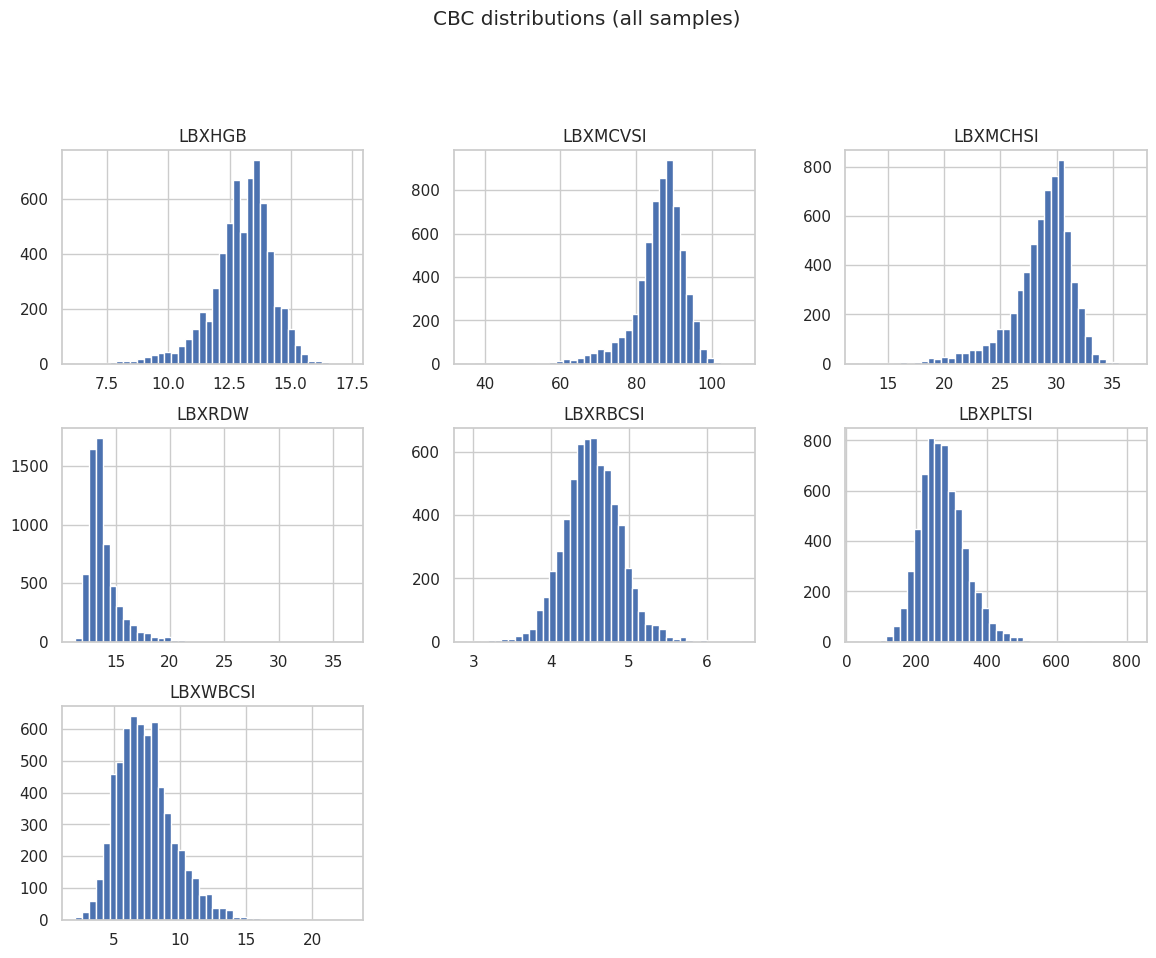

In [ ]:
cbc_core = [
    "LBXHGB", "LBXMCVSI", "LBXMCHSI", "LBXRDW",
    "LBXRBCSI", "LBXPLTSI", "LBXWBCSI"
]

eda_df[cbc_core].hist(
    bins=40,
    figsize=(14,10),
    layout=(3,3)
)
plt.suptitle("CBC distributions (all samples)", y=1.02)
plt.show()


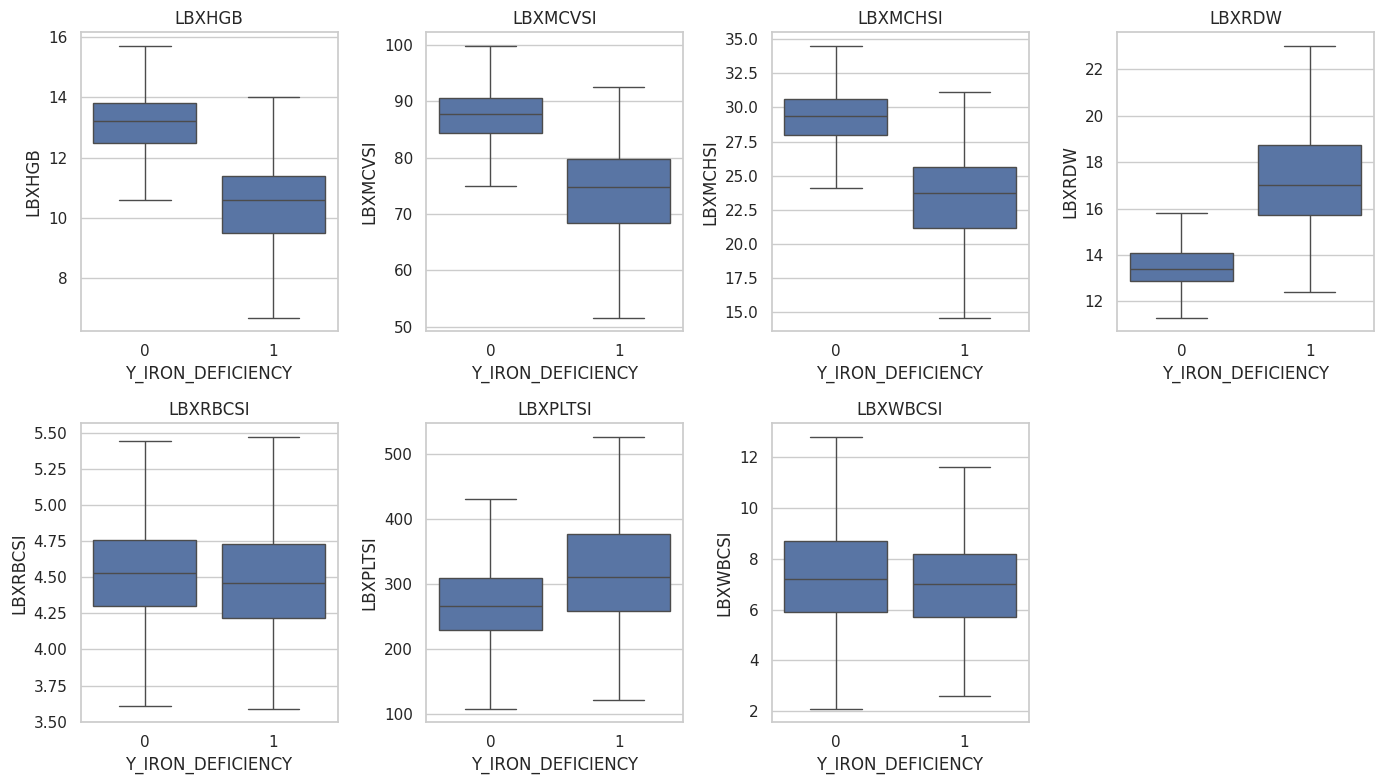

In [ ]:
plt.figure(figsize=(14,8))

for i, col in enumerate(cbc_core, 1):
    plt.subplot(2,4,i)
    sns.boxplot(
        x=TARGET_COL,
        y=col,
        data=eda_df,
        showfliers=False
    )
    plt.title(col)

plt.tight_layout()
plt.show()

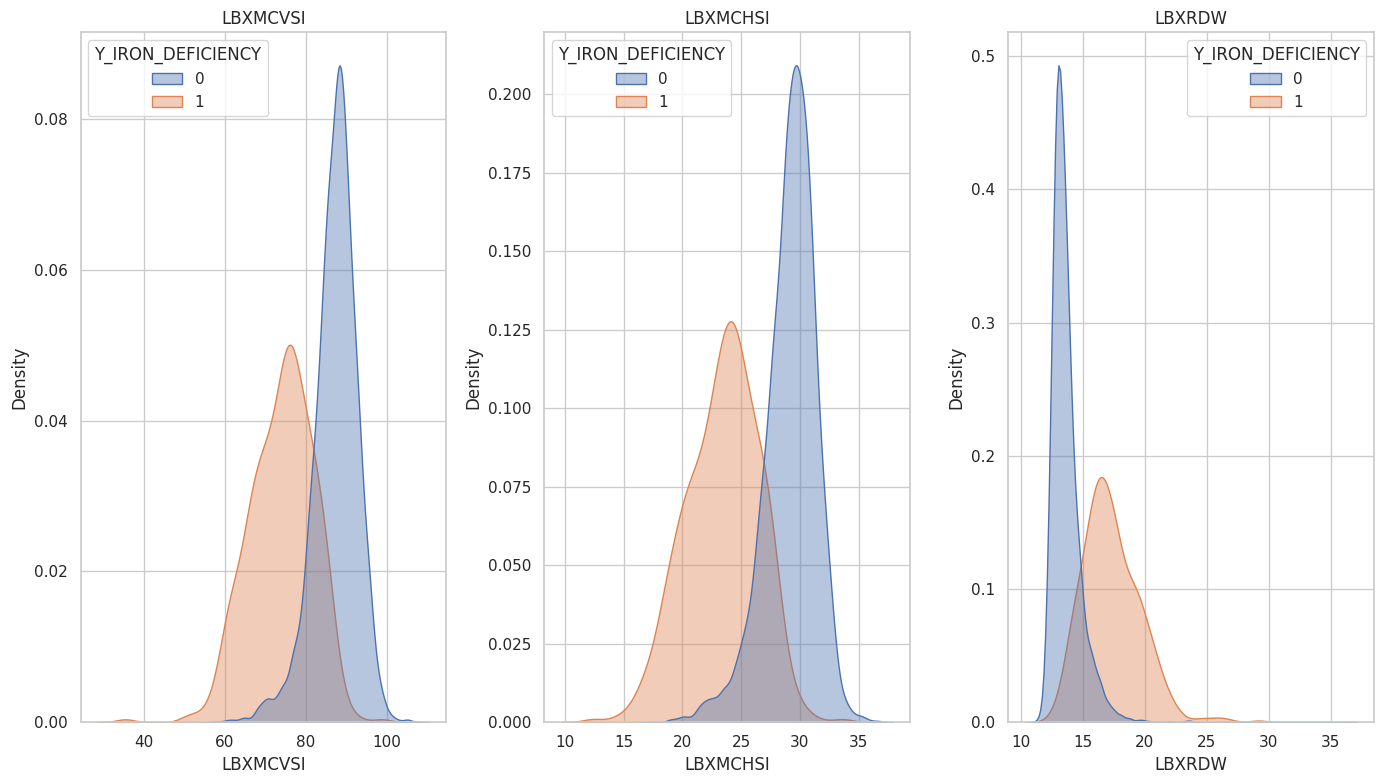

In [ ]:
plt.figure(figsize=(14,8))

for i, col in enumerate(["LBXMCVSI", "LBXMCHSI", "LBXRDW"], 1):
    plt.subplot(1,3,i)
    sns.kdeplot(
        data=eda_df,
        x=col,
        hue=TARGET_COL,
        common_norm=False,
        fill=True,
        alpha=0.4
    )
    plt.title(col)

plt.tight_layout()
plt.show()

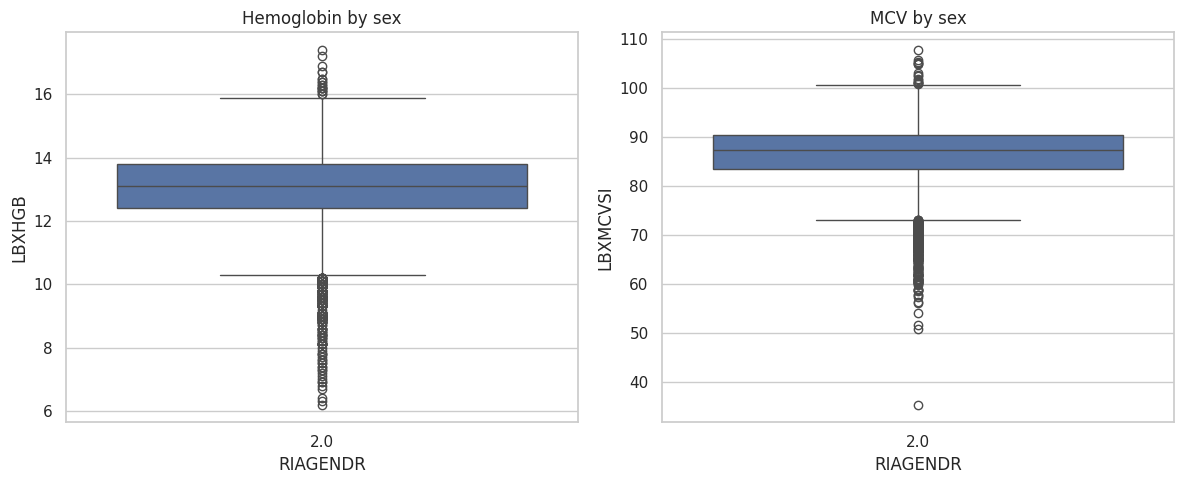

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(
    x="RIAGENDR",
    y="LBXHGB",
    data=eda_df
)
plt.title("Hemoglobin by sex")

plt.subplot(1,2,2)
sns.boxplot(
    x="RIAGENDR",
    y="LBXMCVSI",
    data=eda_df
)
plt.title("MCV by sex")

plt.tight_layout()
plt.show()

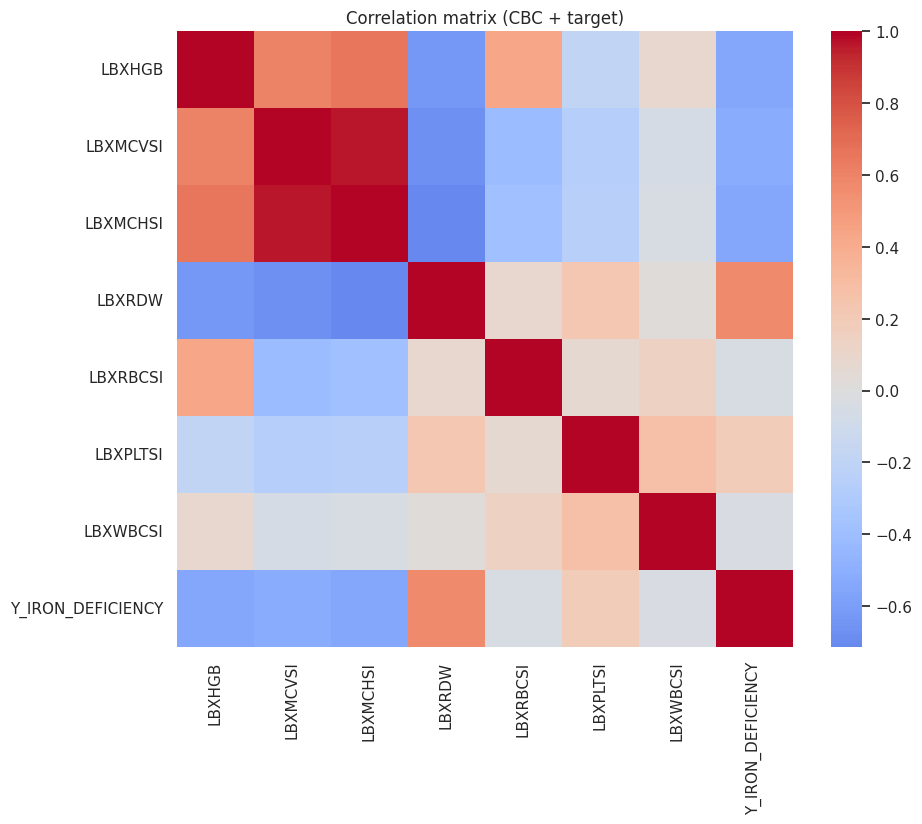

In [ ]:
plt.figure(figsize=(10,8))
corr = eda_df[cbc_core + [TARGET_COL]].corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation matrix (CBC + target)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_vec,
    test_size=0.2,
    stratify=y_vec,
    random_state=42
)

print("Train size:", X_train.shape, "Pos rate:", y_train.mean())
print("Test  size:", X_test.shape,  "Pos rate:", y_test.mean())

Train size: (5042, 17) Pos rate: 0.07100357001190004
Test  size: (1261, 17) Pos rate: 0.07057890563045202


In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=100
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)

0:	test: 0.9539345	best: 0.9539345 (0)	total: 51.3ms	remaining: 51.2s
100:	test: 0.9650171	best: 0.9700502 (5)	total: 895ms	remaining: 7.97s
200:	test: 0.9622944	best: 0.9700502 (5)	total: 1.68s	remaining: 6.7s
300:	test: 0.9611152	best: 0.9700502 (5)	total: 2.6s	remaining: 6.03s
400:	test: 0.9594566	best: 0.9700502 (5)	total: 3.86s	remaining: 5.76s
500:	test: 0.9585554	best: 0.9700502 (5)	total: 4.73s	remaining: 4.71s
600:	test: 0.9582199	best: 0.9700502 (5)	total: 5.64s	remaining: 3.75s
700:	test: 0.9586225	best: 0.9700502 (5)	total: 6.48s	remaining: 2.76s
800:	test: 0.9584691	best: 0.9700502 (5)	total: 7.27s	remaining: 1.81s
900:	test: 0.9576830	best: 0.9700502 (5)	total: 7.59s	remaining: 834ms
999:	test: 0.9572516	best: 0.9700502 (5)	total: 7.91s	remaining: 0us

bestTest = 0.9700502358
bestIteration = 5

Shrink model to first 6 iterations.


In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC :", average_precision_score(y_test, y_proba))

ROC-AUC: 0.9700502358400123
PR-AUC : 0.7784839679121573


In [ ]:
THRESHOLD = 0.3 #Достаточно вариабельный параметр recall/precision - тк он либо дает больше знаков: "ДЕЛАТЬ" / "НЕ ДЕЛАТЬ"

In [ ]:
from sklearn.metrics import classification_report

y_pred = (y_proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.553     0.712      1172
           1      0.145     1.000     0.254        89

    accuracy                          0.584      1261
   macro avg      0.573     0.776     0.483      1261
weighted avg      0.940     0.584     0.680      1261



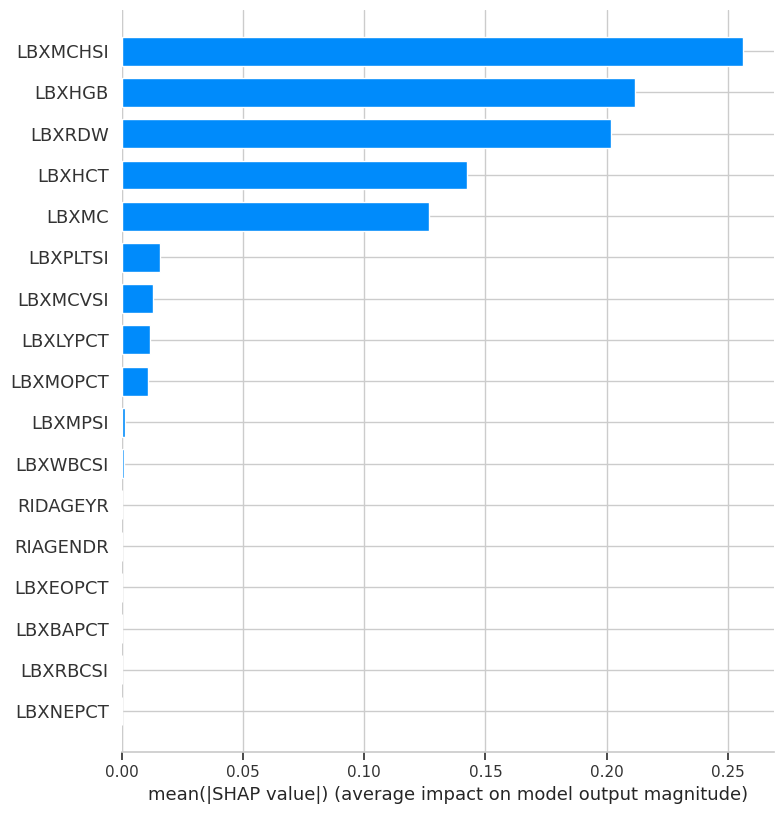

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

# Тест валидации


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y_vec, test_size=0.2, stratify=y_vec, random_state=42
)

y_tr_perm = y_tr.sample(frac=1.0, random_state=42).reset_index(drop=True)
X_tr_perm = X_tr.reset_index(drop=True)

m = CatBoostClassifier(
    iterations=800, depth=6, learning_rate=0.05,
    auto_class_weights="Balanced", verbose=False, random_seed=42
)
m.fit(X_tr_perm, y_tr_perm)
p = m.predict_proba(X_te)[:, 1]

print("Permutation AUC:", roc_auc_score(y_te, p))

Permutation AUC: 0.48579207730950646


In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score
from catboost import CatBoostClassifier

rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

aucs, praucs = [], []
for tr, te in rkf.split(X, y_vec):
    X_tr, X_te = X.iloc[tr], X.iloc[te]
    y_tr, y_te = y_vec.iloc[tr], y_vec.iloc[te]

    m = CatBoostClassifier(
        iterations=2000, depth=6, learning_rate=0.03,
        auto_class_weights="Balanced", verbose=False, random_seed=42
    )
    m.fit(X_tr, y_tr)
    p = m.predict_proba(X_te)[:, 1]
    aucs.append(roc_auc_score(y_te, p))
    praucs.append(average_precision_score(y_te, p))

print("ROC-AUC mean±std:", float(np.mean(aucs)), float(np.std(aucs)))
print("PR-AUC  mean±std:", float(np.mean(praucs)), float(np.std(praucs)))

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
from catboost import CatBoostClassifier

df = X_kdl.merge(y[["SEQN", TARGET_COL]], on="SEQN", how="inner").dropna()
df[TARGET_COL] = df[TARGET_COL].astype(int)

# если решили домен: женщины 18–49
df = df[(df["RIAGENDR"] == 2) & (df["RIDAGEYR"] >= 18) & (df["RIDAGEYR"] <= 49)]

train_df = df[df["RIDAGEYR"] <= 30]
test_df  = df[df["RIDAGEYR"] >= 40]

X_tr = train_df.drop(columns=["SEQN", TARGET_COL])
y_tr = train_df[TARGET_COL]
X_te = test_df.drop(columns=["SEQN", TARGET_COL])
y_te = test_df[TARGET_COL]

m = CatBoostClassifier(iterations=2000, depth=6, learning_rate=0.03,
                       auto_class_weights="Balanced", verbose=False, random_seed=42)
m.fit(X_tr, y_tr)
p = m.predict_proba(X_te)[:,1]

print("Age-holdout ROC-AUC:", roc_auc_score(y_te, p))
print("Age-holdout PR-AUC :", average_precision_score(y_te, p))
print("Train n / pos:", len(train_df), y_tr.mean())
print("Test  n / pos:", len(test_df), y_te.mean())

Age-holdout ROC-AUC: 0.971672409870542
Age-holdout PR-AUC : 0.7849873800940764
Train n / pos: 1937 0.06350025813113061
Test  n / pos: 1546 0.08214747736093143


Brier: 0.12115627824753897


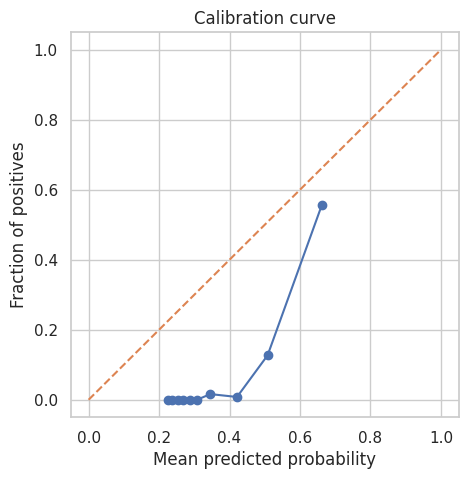

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# берем твой базовый split и обученную модель
y_proba = model.predict_proba(X_test)[:,1]

print("Brier:", brier_score_loss(y_test, y_proba))

frac_pos, mean_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy="quantile")

plt.figure(figsize=(5,5))
plt.plot(mean_pred, frac_pos, marker="o")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Calibration curve")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.show()

Brier: 0.12115627824753897


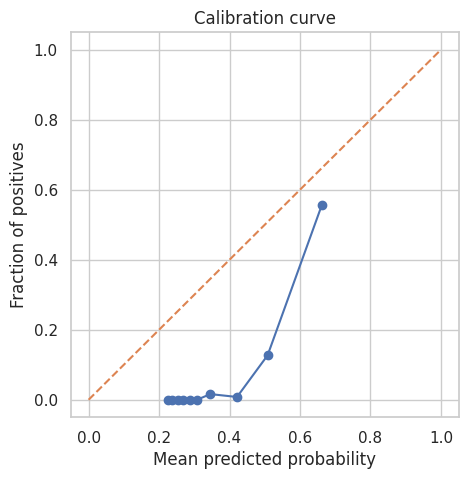

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# берем твой базовый split и обученную модель
y_proba = model.predict_proba(X_test)[:,1]

print("Brier:", brier_score_loss(y_test, y_proba))

frac_pos, mean_pred = calibration_curve(y_test, y_proba, n_bins=10, strategy="quantile")

plt.figure(figsize=(5,5))
plt.plot(mean_pred, frac_pos, marker="o")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Calibration curve")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.show()

In [ ]:
model.save_model("ironrisk_catboost.cbm")

# Final

In [ ]:
# финальный датасет
df_final = X_kdl.merge(
    y[["SEQN", TARGET_COL]], on="SEQN", how="inner"
).dropna()

# домен применения
df_final = df_final[
    (df_final["RIAGENDR"] == 2)
]

X_final = df_final.drop(columns=["SEQN", TARGET_COL])
y_final = df_final[TARGET_COL].astype(int)

print("Final train shape:", X_final.shape, "Pos rate:", y_final.mean())

Final train shape: (6289, 17) Pos rate: 0.07091747495627286


In [ ]:
from catboost import CatBoostClassifier

final_model = CatBoostClassifier(
    iterations=2000,
    depth=6,
    learning_rate=0.03,
    loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=200
)

final_model.fit(X_final, y_final)

0:	total: 23.2ms	remaining: 46.4s
200:	total: 1.96s	remaining: 17.5s
400:	total: 2.84s	remaining: 11.3s
600:	total: 3.51s	remaining: 8.18s
800:	total: 4.22s	remaining: 6.31s
1000:	total: 4.93s	remaining: 4.92s
1200:	total: 5.62s	remaining: 3.74s
1400:	total: 6.32s	remaining: 2.7s
1600:	total: 7.01s	remaining: 1.75s
1800:	total: 7.65s	remaining: 846ms
1999:	total: 8.72s	remaining: 0us


In [ ]:
final_model.save_model("ironrisk_bi_women18_49.cbm")

In [ ]:
import json

meta = {
    "model_name": "IronRisk_BI_v1",
    "domain": "Women 18–49",
    "target": "Body Iron deficiency (NHANES sTfR-based)",
    "n_samples": int(len(X_final)),
    "positive_rate": float(y_final.mean()),
    "features": X_final.columns.tolist(),
    "training_date": "2026-02-08",
    "notes": [
        "Model validated with permutation test, repeated CV, age-holdout",
        "Not applicable to men or women >49 years",
        "CRP not used in training; context-only"
    ]
}

with open("ironrisk_bi_women18_49_meta.json", "w") as f:
    json.dump(meta, f, indent=2)

# Другие модели


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

TARGET_COL = "Y_IRON_DEFICIENCY"

df = X_kdl.merge(y[["SEQN", TARGET_COL]], on="SEQN", how="inner").dropna()
df[TARGET_COL] = df[TARGET_COL].astype(int)

X_all = df.drop(columns=["SEQN", TARGET_COL])
y_all = df[TARGET_COL]

print("X_all:", X_all.shape, "pos_rate:", float(y_all.mean()))


X_all: (6289, 17) pos_rate: 0.07091747495627286


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

scoring = {
    "roc_auc": "roc_auc",
    "pr_auc": "average_precision"
}

# Чтобы потом смотреть лучшую модель по PR-AUC
REFIT_METRIC = "pr_auc"

In [ ]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced", solver="liblinear"))
])

param_lr = {
    "clf__C": [0.01, 0.1, 1, 10, 100]
}

gs_lr = GridSearchCV(pipe_lr, param_lr, scoring=scoring, refit=REFIT_METRIC, cv=cv, n_jobs=-1, verbose=1)
gs_lr.fit(X_all, y_all)

print("LR best params:", gs_lr.best_params_)
print("LR best PR-AUC:", gs_lr.best_score_)


Fitting 15 folds for each of 5 candidates, totalling 75 fits
LR best params: {'clf__C': 1}
LR best PR-AUC: 0.7591028444895436


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

base_svc = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(class_weight="balanced", max_iter=10000))
])

# Grid по C внутри LinearSVC
# Калибровку делаем после подбора C (так быстрее и корректнее)
param_svc = {"svc__C": [0.01, 0.1, 1, 10]}

gs_svc = GridSearchCV(base_svc, param_svc, scoring=scoring, refit=REFIT_METRIC, cv=cv, n_jobs=-1, verbose=1)
gs_svc.fit(X_all, y_all)

print("LinearSVC best params:", gs_svc.best_params_)
print("LinearSVC best PR-AUC (uncalibrated scores):", gs_svc.best_score_)

# Калибруем уже лучшую модель
svc_best = gs_svc.best_estimator_
svc_cal = CalibratedClassifierCV(svc_best, method="sigmoid", cv=5)
svc_cal.fit(X_all, y_all)


Fitting 15 folds for each of 4 candidates, totalling 60 fits
LinearSVC best params: {'svc__C': 0.1}
LinearSVC best PR-AUC (uncalibrated scores): 0.759389406219288


,"estimator estimator: estimator instance, default=NoneThe classifier whose output need to be calibrated to provide moreaccurate `predict_proba` outputs. The default classifier isa :class:`~sklearn.svm.LinearSVC`... versionadded:: 1.2",Pipeline(step...iter=10000))])
,"method method: {'sigmoid', 'isotonic', 'temperature'}, default='sigmoid'The method to use for calibration. Can be:- 'sigmoid', which corresponds to Platt's method (i.e. a binary logistic regression model).- 'isotonic', which is a non-parametric approach.- 'temperature', temperature scaling.Sigmoid and isotonic calibration methods natively support only binaryclassifiers and extend to multi-class classification using a One-vs-Rest (OvR)strategy with post-hoc renormalization, i.e., adjusting the probabilities aftercalibration to ensure they sum up to 1.In contrast, temperature scaling naturally supports multi-class calibration byapplying `softmax(classifier_logits/T)` with a value of `T` (temperature)that optimizes the log loss.For very uncalibrated classifiers on very imbalanced datasets, sigmoidcalibration might be preferred because it fits an additional interceptparameter. This helps shift decision boundaries appropriately when theclassifier being calibrated is biased towards the majority class.Isotonic calibration is not recommended when the number of calibration samplesis too low ``(≪1000)`` since it then tends to overfit... versionchanged:: 1.8 Added option 'temperature'.",'sigmoid'
,"cv cv: int, cross-validation generator, or iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross-validation,- integer, to specify the number of folds.- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if ``y`` is binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used. If ``y`` isneither binary nor multiclass, :class:`~sklearn.model_selection.KFold`is used.Refer to the :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors.Base estimator clones are fitted in parallel across cross-validationiterations.See :term:`Glossary ` for more details... versionadded:: 0.24",None
,"ensemble ensemble: bool, or ""auto"", default=""auto""Determines how the calibrator is fitted.""auto"" will use `False` if the `estimator` is a:class:`~sklearn.frozen.FrozenEstimator`, and `True` otherwise.If `True`, the `estimator` is fitted using training data, andcalibrated using testing data, for each `cv` fold. The final estimatoris an ensemble of `n_cv` fitted classifier and calibrator pairs, where`n_cv` is the number of cross-validation folds. The output is theaverage predicted probabilities of all pairs.If `False`, `cv` is used to compute unbiased predictions, via:func:`~sklearn.model_selection.cross_val_predict`, which are thenused for calibration. At prediction time, the classifier used is the`estimator` trained on all the data.Note that this method is also internally implemented in:mod:`sklearn.svm` estimators with the `probabilities=True` parameter... versionadded:: 0.24.. versionchanged:: 1.6 `""auto""` option is added and is the default.",'auto'
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""medi

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("clf", DecisionTreeClassifier(class_weight="balanced", random_state=42))
])

param_dt = {
    "clf__max_depth": [2, 3, 4, 5, 6, None],
    "clf__min_samples_leaf": [1, 5, 10, 20],
    "clf__min_samples_split": [2, 10, 50]
}

gs_dt = GridSearchCV(pipe_dt, param_dt, scoring=scoring, refit=REFIT_METRIC, cv=cv, n_jobs=-1, verbose=1)
gs_dt.fit(X_all, y_all)

print("DT best params:", gs_dt.best_params_)
print("DT best PR-AUC:", gs_dt.best_score_)


Fitting 15 folds for each of 72 candidates, totalling 1080 fits
DT best params: {'clf__max_depth': 6, 'clf__min_samples_leaf': 20, 'clf__min_samples_split': 50}
DT best PR-AUC: 0.6738451965313522


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("clf", RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

param_rf = {
    "clf__n_estimators": [300, 800],
    "clf__max_depth": [None, 6, 10],
    "clf__min_samples_leaf": [1, 5, 10],
    "clf__max_features": ["sqrt", 0.7, 1.0]
}

gs_rf = GridSearchCV(pipe_rf, param_rf, scoring=scoring, refit=REFIT_METRIC, cv=cv, n_jobs=-1, verbose=1)
gs_rf.fit(X_all, y_all)

print("RF best params:", gs_rf.best_params_)
print("RF best PR-AUC:", gs_rf.best_score_)

Fitting 15 folds for each of 54 candidates, totalling 810 fits
RF best params: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 10, 'clf__n_estimators': 300}
RF best PR-AUC: 0.7699564261022357


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("clf", GradientBoostingClassifier(random_state=42))
])

param_gb = {
    "clf__n_estimators": [200, 500],
    "clf__learning_rate": [0.03, 0.05, 0.1],
    "clf__max_depth": [2, 3]
}

gs_gb = GridSearchCV(pipe_gb, param_gb, scoring=scoring, refit=REFIT_METRIC, cv=cv, n_jobs=-1, verbose=1)
gs_gb.fit(X_all, y_all)

print("GB best params:", gs_gb.best_params_)
print("GB best PR-AUC:", gs_gb.best_score_)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
GB best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 2, 'clf__n_estimators': 200}
GB best PR-AUC: 0.7734528936482793


In [ ]:
!pip -q install -U catboost

In [ ]:
from catboost import Pool, cv, CatBoostClassifier
import numpy as np
import pandas as pd

pool = Pool(X_all, y_all)

grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.03, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 10],
    "iterations": [2000],  # итерации можно фиксировать, CV сам отберёт лучший итератор
}

best = None
best_row = None

for depth in grid["depth"]:
    for lr in grid["learning_rate"]:
        for l2 in grid["l2_leaf_reg"]:
            params = {
                "loss_function": "Logloss",
                "eval_metric": "AUC",
                "random_seed": 42,
                "auto_class_weights": "Balanced",
                "depth": depth,
                "learning_rate": lr,
                "l2_leaf_reg": l2,
                "iterations": 2000,
                "verbose": False
            }

            cv_res = cv(
                pool,
                params,
                fold_count=5,
                shuffle=True,
                partition_random_seed=42,
                verbose=False
            )

            auc_mean = float(cv_res["test-AUC-mean"].max())
            auc_std  = float(cv_res["test-AUC-std"].iloc[cv_res["test-AUC-mean"].idxmax()])

            if (best is None) or (auc_mean > best):
                best = auc_mean
                best_row = (params, auc_mean, auc_std)

best_row

Training on fold [0/5]

bestTest = 0.9723695466
bestIteration = 114

Training on fold [1/5]

bestTest = 0.9674647495
bestIteration = 407

Training on fold [2/5]

bestTest = 0.9573629627
bestIteration = 62

Training on fold [3/5]

bestTest = 0.9714483608
bestIteration = 226

Training on fold [4/5]

bestTest = 0.9753732492
bestIteration = 102

Training on fold [0/5]

bestTest = 0.9731204258
bestIteration = 259

Training on fold [1/5]

bestTest = 0.9667342682
bestIteration = 360

Training on fold [2/5]

bestTest = 0.9566324814
bestIteration = 30

Training on fold [3/5]

bestTest = 0.9708134524
bestIteration = 153

Training on fold [4/5]

bestTest = 0.9766623057
bestIteration = 113

Training on fold [0/5]

bestTest = 0.9728352818
bestIteration = 62

Training on fold [1/5]

bestTest = 0.9676089234
bestIteration = 869

Training on fold [2/5]

bestTest = 0.9570265568
bestIteration = 30

Training on fold [3/5]

bestTest = 0.9712655841
bestIteration = 288

Training on fold [4/5]

bestTest = 0.9

({'loss_function': 'Logloss',
  'eval_metric': 'AUC',
  'random_seed': 42,
  'auto_class_weights': 'Balanced',
  'depth': 4,
  'learning_rate': 0.03,
  'l2_leaf_reg': 1,
  'iterations': 2000,
  'verbose': False},
 0.9683062248305487,
 0.0073227438456478465)

In [ ]:
best_params = best_row[0].copy()
best_params.pop("verbose", None)

cb_best = CatBoostClassifier(**best_params, verbose=200)
cb_best.fit(X_all, y_all)

0:	total: 2.92ms	remaining: 5.84s
200:	total: 463ms	remaining: 4.14s
400:	total: 943ms	remaining: 3.76s
600:	total: 1.78s	remaining: 4.15s
800:	total: 2.69s	remaining: 4.03s
1000:	total: 3.15s	remaining: 3.14s
1200:	total: 3.6s	remaining: 2.39s
1400:	total: 4.06s	remaining: 1.74s
1600:	total: 4.51s	remaining: 1.12s
1800:	total: 4.98s	remaining: 550ms
1999:	total: 5.42s	remaining: 0us


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from catboost import CatBoostClassifier

X_tr, X_te, y_tr, y_te = train_test_split(
    X_all, y_all, test_size=0.2, stratify=y_all, random_state=42
)

cb = CatBoostClassifier(**best_params, verbose=False)
cb.fit(X_tr, y_tr)

p = cb.predict_proba(X_te)[:,1]
print("CatBoost holdout ROC-AUC:", roc_auc_score(y_te, p))
print("CatBoost holdout PR-AUC :", average_precision_score(y_te, p))

CatBoost holdout ROC-AUC: 0.9585067425341932
CatBoost holdout PR-AUC : 0.7430704692997354


In [ ]:
results = []

def add_result(name, gs):
    # gs должен быть уже fit()
    res = {
        "model": name,
        "best_pr_auc": float(gs.best_score_),             # т.к. refit="pr_auc"
        "best_roc_auc": float(gs.cv_results_["mean_test_roc_auc"][gs.best_index_]),
        "params": gs.best_params_
    }
    results.append(res)

add_result("LogReg", gs_lr)
add_result("LinearSVC", gs_svc)
add_result("DecisionTree", gs_dt)
add_result("RandomForest", gs_rf)
add_result("GradBoost", gs_gb)

for r in sorted(results, key=lambda d: d["best_pr_auc"], reverse=True):
    print(r["model"], "| PR-AUC:", round(r["best_pr_auc"], 4), "| ROC-AUC:", round(r["best_roc_auc"], 4))
    print("  params:", r["params"])


GradBoost | PR-AUC: 0.7735 | ROC-AUC: 0.9664
  params: {'clf__learning_rate': 0.05, 'clf__max_depth': 2, 'clf__n_estimators': 200}
RandomForest | PR-AUC: 0.77 | ROC-AUC: 0.9652
  params: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 10, 'clf__n_estimators': 300}
LinearSVC | PR-AUC: 0.7594 | ROC-AUC: 0.9658
  params: {'svc__C': 0.1}
LogReg | PR-AUC: 0.7591 | ROC-AUC: 0.9659
  params: {'clf__C': 1}
DecisionTree | PR-AUC: 0.6738 | ROC-AUC: 0.9322
  params: {'clf__max_depth': 6, 'clf__min_samples_leaf': 20, 'clf__min_samples_split': 50}


In [ ]:
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score
from catboost import CatBoostClassifier

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

cb_params = dict(
    iterations=2000,
    depth=4,
    learning_rate=0.03,
    l2_leaf_reg=1,
    loss_function="Logloss",
    auto_class_weights="Balanced",
    random_seed=42,
    verbose=False
)

aucs, praucs = [], []
for tr, te in cv.split(X_all, y_all):
    X_tr, X_te = X_all.iloc[tr], X_all.iloc[te]
    y_tr, y_te = y_all.iloc[tr], y_all.iloc[te]

    m = CatBoostClassifier(**cb_params)
    m.fit(X_tr, y_tr)
    p = m.predict_proba(X_te)[:,1]

    aucs.append(roc_auc_score(y_te, p))
    praucs.append(average_precision_score(y_te, p))

print("CatBoost CV ROC-AUC mean±std:", float(np.mean(aucs)), float(np.std(aucs)))
print("CatBoost CV PR-AUC  mean±std:", float(np.mean(praucs)), float(np.std(praucs)))


CatBoost CV ROC-AUC mean±std: 0.9580047131721199 0.0076543889490614
CatBoost CV PR-AUC  mean±std: 0.7465554690567048 0.02428276808049076
